In [1]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import *

In [2]:
usa_2018_df = pd.read_csv('usa_2018_cars')

In [3]:
usa_2018_df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
usa_car_categorical_df = usa_2018_df[['model_id','model_make_display','model_engine_compression','model_make_id','model_name','model_trim']]

In [5]:
usa_car_numerical_df = usa_2018_df.drop(['model_make_display','model_engine_compression','model_make_id','model_name','model_trim'],axis=1)

In [6]:
usa_car_numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230 entries, 0 to 3229
Data columns (total 20 columns):
model_id                       3230 non-null int64
model_year                     3230 non-null int64
model_body                     3230 non-null object
model_engine_position          3230 non-null object
model_engine_cc                3230 non-null float64
model_engine_cyl               3230 non-null float64
model_engine_type              3230 non-null object
model_engine_valves_per_cyl    3230 non-null float64
model_engine_power_ps          3230 non-null float64
model_engine_torque_nm         3230 non-null float64
model_engine_fuel              3230 non-null object
model_drive                    3230 non-null object
model_transmission_type        3230 non-null object
model_doors                    3230 non-null float64
model_weight_kg                3230 non-null float64
model_lkm_hwy                  3230 non-null float64
model_lkm_mixed                3230 non-null float64
mo

In [7]:
import pandas_profiling

In [8]:
pandas_profiling.ProfileReport(usa_car_numerical_df)

In [9]:
usa_car_numerical_df.drop(['model_lkm_hwy','model_lkm_city'],axis=1,inplace=True)

In [10]:

# for an approximate result, divide the speed value by 1.609
# mm to in divide the length value by 25.4
# kg to lbs for an approximate result, multiply the mass value by 2.205
# l to gal for an approximate result, divide the volume value by 3.785

In [11]:
def lkm_to_mpg(lkm):
    return round((3.785411784*(lkm/1.609344)),1)
usa_car_numerical_df['average_mpg'] = usa_car_numerical_df['model_lkm_mixed']

In [12]:
usa_car_numerical_df['model_horsepower'] = usa_car_numerical_df['model_engine_power_ps']

In [13]:
def mm_to_inches(mm):
    return round(mm/25.4,1)
# usa_car_numerical_df['model_lenght_in'] = usa_car_numerical_df['model_length_mm'].apply(mm_to_inches)
# # usa_car_numerical_df['model_width_in'] = usa_car_numerical_df['model_width_mm'].apply(mm_to_inches)
# usa_car_numerical_df['model_height_in'] = usa_car_numerical_df['model_height_mm'].apply(mm_to_inches)
# usa_car_numerical_df['model_wheelbase_in'] = usa_car_numerical_df['model_wheelbase_mm'].apply(mm_to_inches)
# usa_car_numerical_df['engine_stroke_in'] = usa_car_numerical_df['model_engine_stroke_mm'].apply(mm_to_inches)
# usa_car_numerical_df['engine_bore_in'] = usa_car_numerical_df['model_engine_bore_mm'].apply(mm_to_inches)

In [14]:
def l_to_gal(l):
    return round(l/3.785,1)
usa_car_numerical_df['fuel_cap_galons'] = usa_car_numerical_df['model_fuel_cap_l']

In [15]:
def nm_to_ftlbs(nm):
    return round(nm*0.73756,1)
usa_car_numerical_df['engine_ft_lbs_torque'] = usa_car_numerical_df['model_engine_torque_nm'].apply(nm_to_ftlbs)

In [16]:
usa_car_numerical_df.drop(['model_lkm_mixed','model_engine_power_ps',
                'model_fuel_cap_l',]
                ,axis=1,inplace=True)

In [17]:
usa_car_numerical_df.drop('model_engine_cc',axis=1,inplace=True)

In [18]:
usa_car_numerical_df.drop('model_engine_torque_nm',axis=1,inplace=True)

In [32]:
usa_car_numerical_df.drop('model_engine_position',axis=1,inplace=True)
usa_car_numerical_df.drop('model_sold_in_us',axis=1,inplace=True)

In [19]:
usa_car_numerical_df.set_index('model_id',inplace=True)

In [37]:
usa_car_numerical_df.columns

Index(['model_year', 'model_engine_cyl', 'model_engine_valves_per_cyl',
       'model_doors', 'model_weight_kg', 'average_mpg', 'model_horsepower',
       'fuel_cap_galons', 'engine_ft_lbs_torque', 'model_body_Compact Cars',
       'model_body_Large Cars', 'model_body_Midsize Cars',
       'model_body_Midsize Station Wagons', 'model_body_Mini Compact Cars',
       'model_body_Minivan', 'model_body_Not Available',
       'model_body_Passenger Vans', 'model_body_Small Pickup Trucks',
       'model_body_Small Sport Utility Vehicles',
       'model_body_Small Station Wagons', 'model_body_Sport Utility Vehicles',
       'model_body_Standard Pickup Trucks',
       'model_body_Standard Sport Utility Vehicles',
       'model_body_Subcompact Cars', 'model_body_Two Seaters',
       'model_drive_Four Wheel Drive', 'model_drive_Front Wheel Driv',
       'model_drive_Rear Wheel Drive', 'model_engine_type_Inline',
       'model_engine_type_V', 'model_engine_type_W',
       'model_engine_fuel_Electri

In [33]:
pandas_profiling.ProfileReport(usa_car_numerical_df)

In [34]:
usa_car_numerical_df = pd.get_dummies(usa_car_numerical_df,columns=['model_body','model_drive',
                                                                    'model_engine_type','model_engine_fuel',
                                                                    'model_transmission_type'],drop_first=True)

In [26]:
usa_car_numerical_df.average_mpg.argmax()

73253

In [29]:
usa_car_numerical_df.average_mpg.mean()

23.564705882352943

In [23]:
usa_car_categorical_df.set_index('model_id',inplace=True)

In [28]:
usa_car_categorical_df.query('73253')

model_make_display                                                 Volkswagen
model_engine_compression                                                 10.5
model_make_id                                                      Volkswagen
model_name                                                              Jetta
model_trim                  Hybrid SEL Premium 4dr Sedan (1.4L 4cyl Turbo ...
Name: 73253, dtype: object

In [76]:
ss = StandardScaler()
ss = ss.fit_transform(usa_car_numerical_df)

In [170]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=38, init='k-means++', n_init=10, max_iter=300, 
                tol=0.0001, precompute_distances=True,verbose=3, random_state=42, copy_x=True,
                n_jobs=None, algorithm='auto').fit(ss)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 27181.242710182672
start iteration
done sorting
end inner loop
Iteration 1, inertia 25714.868970621505
start iteration
done sorting
end inner loop
Iteration 2, inertia 25123.35322083585
start iteration
done sorting
end inner loop
Iteration 3, inertia 24724.07915329791
start iteration
done sorting
end inner loop
Iteration 4, inertia 24564.368195616895
start iteration
done sorting
end inner loop
Iteration 5, inertia 24540.413987755237
start iteration
done sorting
end inner loop
Iteration 6, inertia 24540.413987755237
center shift 0.000000e+00 within tolerance 1.000000e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 26433.0533740507
start iteration
done sorting
end inner loop
Iteration 1, inertia 25166.315176307584
start iteration
done sorting
end inner loop
Iteration 2, inertia 24944.382466874802
start iteration
done sorting
end inner loop
Iteration 3, ine

In [207]:
args = np.argwhere(kmeans.labels_ == 36).shape

In [209]:
args[0]

84

In [222]:
def get_model_id_name(cluster):
    for num in cluster:
        x_shape = np.argwhere(kmeans.labels_ == num).shape[0]
        args = np.argwhere(kmeans.labels_ == num).reshape(x_shape,)
        print(just_model_id_name.iloc[args])
        
get_model_id_name([33,6])

          model_make_id          model_name
model_id                                   
71349              Audi                  A3
71353        Volkswagen            Golf GTI
71388            Subaru                 WRX
71408        Volkswagen              Golf R
71445              Audi                  A3
71561            Subaru                 WRX
71563            Subaru                 WRX
71982        Volkswagen            Golf GTI
71983        Volkswagen            Golf GTI
71984        Volkswagen            Golf GTI
71985        Volkswagen            Golf GTI
71986        Volkswagen            Golf GTI
71987        Volkswagen            Golf GTI
71988        Volkswagen            Golf GTI
71989        Volkswagen            Golf GTI
71990        Volkswagen            Golf GTI
72866        Volkswagen                  CC
72867        Volkswagen                  CC
72868        Volkswagen                  CC
72869        Volkswagen                  CC
72870        Volkswagen         

In [212]:
just_model_id_name = no_model_trim.drop(['model_make_display','model_engine_compression'],axis=1)

In [203]:
no_model_trim.iloc[args]

model_make_display model_engine_compression model_make_id  \
model_id                                                             
71362                   GMC                       11           GMC   
71363                   GMC                       11           GMC   
71364             Chevrolet                       11     Chevrolet   
71365             Chevrolet                       11     Chevrolet   
71366              Cadillac                 Not Avai      Cadillac   
71367              Cadillac                 Not Avai      Cadillac   
71429             Chevrolet                       11     Chevrolet   
71430             Chevrolet                       11     Chevrolet   
71431             Chevrolet                       11     Chevrolet   
71432             Chevrolet                       11     Chevrolet   
71433             Chevrolet                       11     Chevrolet   
71478             Chevrolet                       11     Chevrolet   
71479             Chevrolet                       11     Chevrolet   
71480             Chevrolet                       11     Chevrolet   
71481             Chevrolet                       11     Chevrolet   
71482             Chevrolet                       11     Chevrolet   
71516                   GMC                       11           GMC   
71517                   GMC                       11           GMC   
71518                   GMC                       11           GMC   
71519                   GMC                     11.5           GMC   
71520                   GMC                     11.5           GMC   
71535              Cadillac                 Not Avai      Cadillac   
71536              Cadillac                 Not Avai      Cadillac   
71537              Cadillac                 Not Avai      Cadillac   
71538              Cadillac                 Not Avai      Cadillac   
71539              Cadillac                 Not Avai      Cadillac   
71549              Cadillac                 Not Avai      Cadillac   
71550              Cadillac                 Not Avai      Cadillac   
71551              Cadillac                 Not Avai      Cadillac   
71552              Cadillac                 Not Avai      Cadillac   
...                     ...                      ...           ...   
74051             Chevrolet                       11     Chevrolet   
74052             Chevrolet                       11     Chevrolet   
74053             Chevrolet                       11     Chevrolet   
74054             Chevrolet                       11     Chevrolet   
74088                   GMC                       11           GMC   
74089                   GMC                       11           GMC   
74090                   GMC                       11           GMC   
74091                   GMC                     11.5           GMC   
74092                   GMC                     11.5           GMC   
74107              Cadillac                 Not Avai      Cadillac   
74108              Cadillac                 Not Avai      Cadillac   
74109              Cadillac                 Not Avai      Cadillac   
74110              Cadillac                 Not Avai      Cadillac   
74111              Cadillac                 Not Avai      Cadillac   
74121              Cadillac                 Not Avai      Cadillac   
74122              Cadillac                 Not Avai      Cadillac   
74123              Cadillac                 Not Avai      Cadillac   
74124              Cadillac                 Not Avai      Cadillac   
74125              Cadillac                 Not Avai      Cadillac   
74139                   GMC                       11           GMC   
74140                   GMC                       11           GMC   
74141                   GMC                     11.5           GMC   
74142                   GMC                     11.5           GMC   
74143                   GMC                       11           GMC   
74831              

In [186]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

car_sparse = sparse.csr_matrix(kmeans.cluster_centers_)

similarities = cosine_similarity(car_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

#also can output sparse matrices
similarities_sparse = cosine_similarity(car_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise dense output:
 [[ 1.         -0.14923043 -0.2027046  ...  0.07586621  0.29635104
  -0.14250127]
 [-0.14923043  1.          0.36193065 ...  0.08056514 -0.19491797
  -0.08614305]
 [-0.2027046   0.36193065  1.         ... -0.54158924 -0.65662214
   0.38520094]
 ...
 [ 0.07586621  0.08056514 -0.54158924 ...  1.          0.61053693
  -0.30523795]
 [ 0.29635104 -0.19491797 -0.65662214 ...  0.61053693  1.
  -0.31134484]
 [-0.14250127 -0.08614305  0.38520094 ... -0.30523795 -0.31134484
   1.        ]]

pairwise sparse output:
   (0, 37)	-0.14250126606257724
  (0, 36)	0.2963510444850178
  (0, 35)	0.07586620612322013
  (0, 34)	-0.19375768504435212
  (0, 33)	-0.18002519275380993
  (0, 32)	0.2913796925460416
  (0, 31)	-0.06242700714394956
  (0, 30)	0.05076618075899343
  (0, 29)	0.19701073526829382
  (0, 28)	0.15533086790708825
  (0, 27)	-0.05542775528327605
  (0, 26)	0.2003147641320442
  (0, 25)	-0.19524386777661615
  (0, 24)	-0.02035639561661646
  (0, 23)	-0.11054194819619083
  (0, 22)	0

In [187]:
import csv
pd.DataFrame(similarities).to_csv('car_cosine_vectors.tsv',sep='\t', quoting=csv.QUOTE_NONE)

In [161]:
no_model_trim = usa_car_categorical_df.drop('model_trim',axis=1)

In [166]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca_df = pca.fit_transform(ss)

In [167]:
def scree_plot(ax, pca, n_components_to_plot=20, title=None):
    """Make a scree plot showing the variance explained (i.e. variance
    of the projections) for the principal components in a fit sklearn
    PCA object.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    pca: sklearn.decomposition.PCA object.
      A fit PCA object.
      
    n_components_to_plot: int
      The number of principal components to display in the scree plot.
      
    title: str
      A title for the scree plot.
    """
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
        (ind[i]+0.2, vals[i]+0.005), 
        va="bottom", 
        ha="center", 
        fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

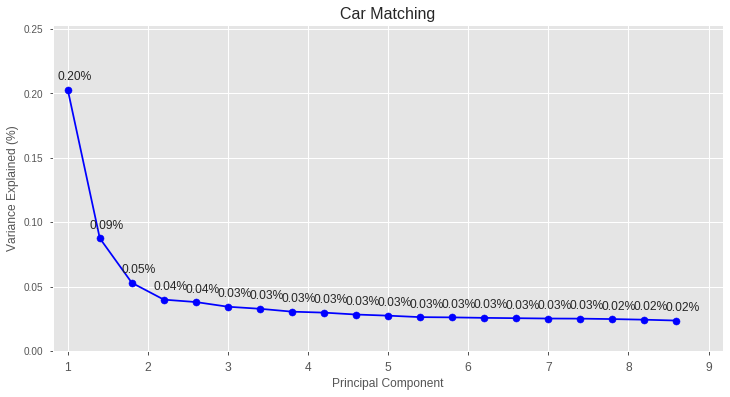

In [169]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,6))
scree_plot(ax, pca, n_components_to_plot=20, title='Car Matching')

In [82]:
usa_car_categorical_df.query('76481')

model_make_display                                   Hyundai
model_engine_compression                                11.5
model_make_id                                        Hyundai
model_name                                             Azera
model_trim                  Limited 4dr Sedan (3.3L 6cyl 6A)
Name: 76481, dtype: object

In [174]:
kmeans.cluster_centers_

array([[ 0.        ,  0.71807263, -1.83128879, ..., -0.29738613,
         0.5814019 , -0.46488112],
       [ 0.        , -0.74129619,  0.31450623, ...,  0.52038626,
         0.55208492, -0.43155668],
       [ 0.        , -0.81802486,  0.29973445, ...,  0.70548393,
         0.24119753, -0.46488112],
       ...,
       [ 0.        ,  0.89594007,  0.31450623, ...,  0.44768544,
         0.5814019 , -0.46488112],
       [ 0.        ,  1.62663875, -2.84032335, ..., -1.03465589,
         0.5814019 , -0.46488112],
       [ 0.        , -0.36723583,  0.31450623, ..., -0.90692223,
        -0.20204747,  0.03604905]])

In [175]:
from sklearn.preprocessing import RobustScaler
robsca = RobustScaler()
robsca = robsca.fit_transform(usa_car_numerical_df)
model = KMeans(n_clusters=38,init='k-means++', max_iter=100, n_init=1,verbose=2)
model.fit(robsca)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 5910.85506458747
start iteration
done sorting
end inner loop
Iteration 1, inertia 5493.634813535708
start iteration
done sorting
end inner loop
Iteration 2, inertia 5400.402152520143
start iteration
done sorting
end inner loop
Iteration 3, inertia 5343.68263260254
start iteration
done sorting
end inner loop
Iteration 4, inertia 5270.606686080633
start iteration
done sorting
end inner loop
Iteration 5, inertia 5254.326628863293
start iteration
done sorting
end inner loop
Iteration 6, inertia 5252.154361744541
start iteration
done sorting
end inner loop
Iteration 7, inertia 5250.688211537117
start iteration
done sorting
end inner loop
Iteration 8, inertia 5250.688211537117
center shift 0.000000e+00 within tolerance 1.930975e-05


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=38, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=2)

In [176]:
args = np.argwhere(kmeans.labels_ == 37).reshape(94,)

In [177]:
no_model_trim.iloc[args]

model_make_display model_engine_compression  model_make_id  \
model_id                                                              
71347                   BMW                     10.2            BMW   
71355            Alfa Romeo                      9.3     Alfa Romeo   
71379                   BMW                     10.2            BMW   
71453                 Volvo                      9.3          Volvo   
71467                   BMW                       10            BMW   
71994                   BMW                     10.2            BMW   
71995                   BMW                       10            BMW   
71996                   BMW                       10            BMW   
71997                   BMW                       10            BMW   
72224                   BMW                     10.2            BMW   
72274                 Acura                     10.6          Acura   
72275                 Acura                     10.6          Acura   
72276                 Acura                     10.6          Acura   
72286                  Audi                      9.6           Audi   
72287                  Audi                      9.6           Audi   
72288                  Audi                      9.6           Audi   
72289                  Audi                      9.6           Audi   
72290                  Audi                      9.6           Audi   
72291                  Audi                      9.6           Audi   
72292                  Audi                      9.6           Audi   
72293                  Audi                      9.6           Audi   
72294                  Audi                      9.6           Audi   
72315                  Audi                     10.3           Audi   
72316                  Audi                     10.3           Audi   
72317                  Audi                     10.3           Audi   
72318                  Audi                     10.3           Audi   
72418                   BMW                 Not Avai            BMW   
72419                   BMW                 Not Avai            BMW   
72420                   BMW                 Not Avai            BMW   
72421                   BMW                 Not Avai            BMW   
...                     ...                      ...            ...   
74862                  Audi                      9.6           Audi   
74863                  Audi                      9.6           Audi   
74864                  Audi                      9.6           Audi   
74865                  Audi                      9.6           Audi   
74866                  Audi                      9.6           Audi   
74887                  Audi                     10.3           Audi   
74888                  Audi                     10.3           Audi   
74889                  Audi                     10.3           Audi   
74890                  Audi                     10.3           Audi   
74990                   BMW                 Not Avai            BMW   
74991                   BMW                 Not Avai            BMW   
74992                   BMW                 Not Avai            BMW   
74993                   BMW                 Not Avai            BMW   
74994                   BMW                 Not Avai            BMW   
74995                   BMW                 Not Avai            BMW   
74996                   BMW                 Not Avai            BMW   
74998                   BMW                 Not Avai            BMW   
74999                   BMW                 Not Avai            BMW   
75000                   BMW                 Not Avai            BMW   
75132            Mitsubishi                        9     Mitsubishi   
75136                 Lexus                       12          Lexus   
75137                 Lexus                       12          Lexus   
75138                 Lexus                     11.8          Lexus   
75139                 Lexus      

In [178]:
np.unique(no_model_trim.iloc[args])

array(['10', '10.2', '10.3', '10.6', '11.5', '11.8', '12', '3 Series',
       '4 Series Gran Coupe', '4C', '8.6', '9', '9.3', '9.6', 'A4',
       'Acura', 'Alfa Romeo', 'Audi', 'BMW', 'CLA-Class', 'Camaro',
       'Chevrolet', 'ILX', 'IS 250', 'IS 350', 'Lancer',
       'Lancer Evolution', 'Lexus', 'M3', 'M4', 'Mercedes-Benz',
       'Mitsubishi', 'Not Avai', 'S4', 'S60', 'Volvo'], dtype=object)

In [45]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
print(order_centroids)

[[ 4  0  6 ... 19 25 20]
 [ 4  0  6 ... 32 14 18]
 [ 4  0  6 ... 24 25 35]
 ...
 [ 4  0  6 ... 22 20 19]
 [ 4  0  6 ... 32 14 18]
 [ 4  0  8 ... 23 22 19]]


In [44]:
print(model.cluster_centers_)

[[2.01850000e+03 4.00000000e+00 4.00000000e+00 ... 3.75000000e-01
  2.22044605e-16 1.00000000e+00]
 [2.01850000e+03 7.50000000e+00 4.00000000e+00 ... 1.11022302e-16
  5.00000000e-01 0.00000000e+00]
 [2.01850000e+03 4.37500000e+00 4.00000000e+00 ... 5.62500000e-01
  1.00000000e+00 0.00000000e+00]
 ...
 [2.01850000e+03 8.00000000e+00 2.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.01850000e+03 6.00000000e+00 4.00000000e+00 ... 1.11022302e-16
  1.00000000e+00 0.00000000e+00]
 [2.01850000e+03 6.00000000e+00 4.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [57]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as py
%matplotlib inline
import tqdm 

In [74]:
silhouette_scores = []
for n in range(2,100):
    n_model = KMeans(n_clusters=n)
    n_model.fit(ss)
    silhouette_scores.append(silhouette_score(ss, n_model.labels_))

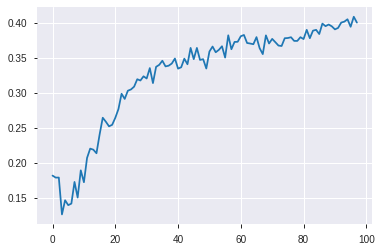

In [75]:
py.plot(silhouette_scores)

In [63]:
from collections import Counter 

In [218]:
assigned_cluster = kmeans.transform(usa_car_numerical_df).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, usa_car_numerical_df.shape[0])[assigned_cluster==i]
    topics = usa_car_categorical_df.iloc[cluster]
    most_common = Counter(topics).most_common()
    print("Cluster %d: %s" % (i, most_common[0][0]))
    if len(most_common) > 1:
        print(" %s" % (most_common[1][0]))

Cluster 0: model_make_display
 model_engine_compression
Cluster 1: model_make_display
 model_engine_compression
Cluster 2: model_make_display
 model_engine_compression
Cluster 3: model_make_display
 model_engine_compression
Cluster 4: model_make_display
 model_engine_compression
Cluster 5: model_make_display
 model_engine_compression
Cluster 6: model_make_display
 model_engine_compression
Cluster 7: model_make_display
 model_engine_compression
Cluster 8: model_make_display
 model_engine_compression
Cluster 9: model_make_display
 model_engine_compression
Cluster 10: model_make_display
 model_engine_compression
Cluster 11: model_make_display
 model_engine_compression
Cluster 12: model_make_display
 model_engine_compression
Cluster 13: model_make_display
 model_engine_compression
Cluster 14: model_make_display
 model_engine_compression
Cluster 15: model_make_display
 model_engine_compression
Cluster 16: model_make_display
 model_engine_compression
Cluster 17: model_make_display
 model_eng